## Part A – Data Preparation

In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [193]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [194]:
df.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [195]:
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [196]:
# Display unique values for each column
for col in df.columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Unique values for column 'Income':
[66161.01279 78639.20248 70207.25321 65866.23872 56774.10995 73442.05848
 57819.04084 91882.97506 97274.70704 53758.11391 84379.37786 64667.11898
 67603.34208 94419.74787 30327.70436 31534.69748 26516.37981 87446.48842
 83361.75632 90250.91112 98396.37567 84936.89232 59610.95217 83539.68822
 33870.58194 72994.0766  35751.49656 95850.16878 64138.62413 56099.6455
 44841.67091 83067.52671 59211.27492 67632.54617 26409.23503 71322.66228
 70907.1792  71270.04977 95781.10589 76136.52243 51963.09254 57777.39653
 77322.33969 29516.91037 75007.50366 75297.84022 40778.69208 34669.47232
 48657.12632 52278.30782 67764.75778 57895.11351 99128.03785 32653.36081
 40665.75671 37098.21384 73983.12441 43996.87019 59973.30796 43331.9194
 36922.71877 33278.13559 74224.71921 35363.72135 39743.67713 52654.3878
 86574.49224 32282.59568 87845.86806 32207.38059 98234.45988 60148.84012
 98257.08161 70363.41398 80444.76845 27939.08442 46210.52219 34014.74209
 47210.51481 33904.

In [197]:
df_encoded = df.copy()

# Nominal Encoding
nominal_cols = ['Education']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'Education': {'Bachelor': 0, 'High School': 1, 'Master': 2, 'PhD': 3}}


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
378,59360.41204,19,0.0,536,4,19,8814.204639,1528.808147,19491.855030,0.573652,3,0.412509
341,39779.07101,63,2.0,845,10,57,7057.523637,25102.183600,14034.850700,0.616039,3,0.487052
99,25352.16071,18,2.0,651,9,77,7675.552241,35202.057070,7796.002661,0.757736,2,0.498355
228,96052.79429,56,0.0,334,12,54,3553.426162,27917.267850,16226.695980,0.470523,1,0.303267
230,44045.62319,42,3.0,472,12,44,3005.742061,28356.962830,15601.508050,0.497455,1,0.941708


## Part B – Exploratory Data Analysis

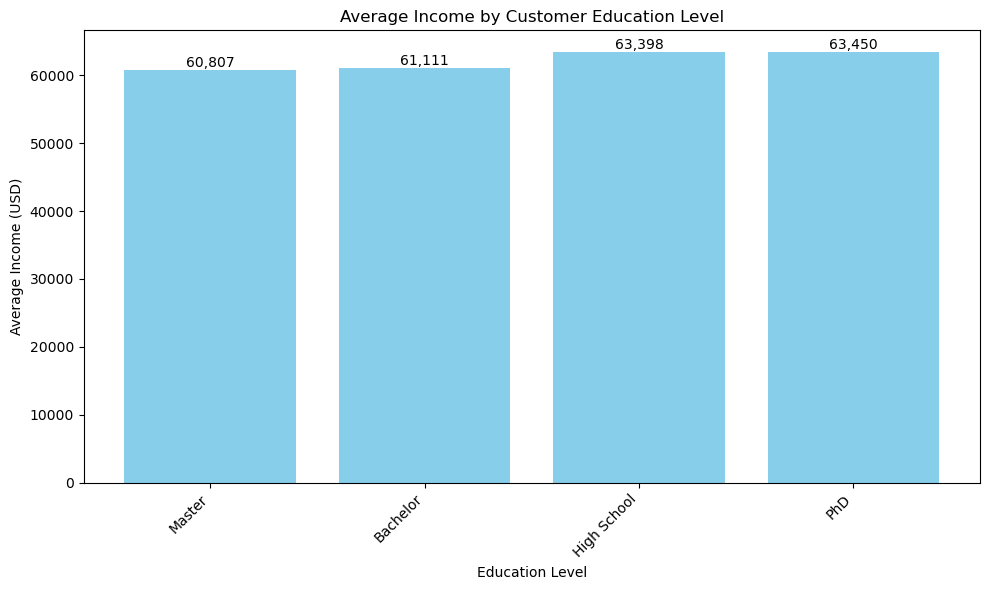

In [229]:
education_income = df.groupby('Education')['Income'].mean().sort_values()

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(education_income.index, education_income.values, color='skyblue')

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,.0f}', 
             ha='center', va='bottom', fontsize=10)

plt.title("Average Income by Customer Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Income (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the barchart, we can see that the distribution of Average Income of each customer education level is even and not big differences. We can see that the average income of customer level with PhD has the highest value, following with High School, but only a slight difference. 

- Customers across different education levels show similar income levels. This suggests that education level does not strongly influence income in this dataset

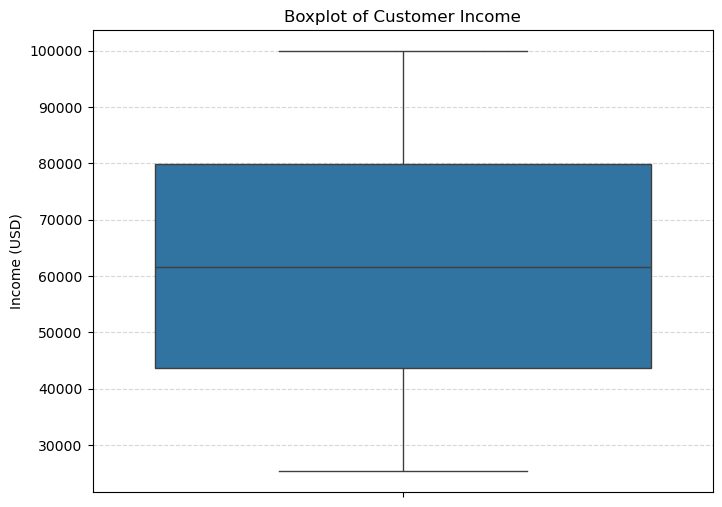

In [227]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['Income'])
plt.title("Boxplot of Customer Income")
plt.ylabel("Income (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

From the boxplot, we can see that the customer income ranges from 40.000 to 80.000 with a min value of less than 30.000 and max value of 100.000. There is no outlier from the chart, so it is safe to use and do not need removing outliers.

## Part C – Clustering Modeling

Agglomerative (Hierarchical)

In [200]:
df_unscaled = df_encoded.copy()

In [201]:
num_cols = [
    "Income",
    "Age",
    "Credit_Score",
    "Years_with_Bank",
    "Transaction_Count",
    "Balance",
    "Loan_Approval_Amount",
    "Credit_Card_Limit",
    "Purchase_Frequency",
    "Online_Activity"
]

# Create a new DataFrame with all other (non-numeric) columns
df_cat = df_encoded.drop(columns=num_cols)

# Show result
df_cat.head()

,Education,Customer_Satisfaction
0,0.0,1
1,1.0,2
2,1.0,3
3,1.0,4
4,0.0,4


In [202]:
num_cols = [
    "Income",
    "Age",
    "Credit_Score",
    "Years_with_Bank",
    "Transaction_Count",
    "Balance",
    "Loan_Approval_Amount",
    "Credit_Card_Limit",
    "Purchase_Frequency",
    "Online_Activity"
]

df_num = df_encoded[num_cols].copy()
df_num.head()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity
0,66161.01279,57,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,0.202693
1,78639.20248,60,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,0.549358
2,70207.25321,46,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,0.842993
3,65866.23872,42,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,0.119473
4,56774.10995,36,410,12,58,538.691042,48586.582480,10144.073090,0.346523,0.990168


In [203]:
# Create the scaler
sc = StandardScaler()

# Fit and transform the numerical columns
df_scaled = sc.fit_transform(df_num)

# Convert back to DataFrame (keep the same column names)
df_scaled = pd.DataFrame(df_scaled, columns=num_cols)

# Show result
df_scaled.head()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-0.992013
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,0.186427
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,1.184595
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,-1.274907
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.684898


In [204]:
df_scaled = pd.concat([df_scaled, df_cat], axis=1)

# Check result
df_scaled.head()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity,Education,Customer_Satisfaction
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-0.992013,0.0,1
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,0.186427,1.0,2
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,1.184595,1.0,3
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,-1.274907,1.0,4
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.684898,0.0,4


### SCALED

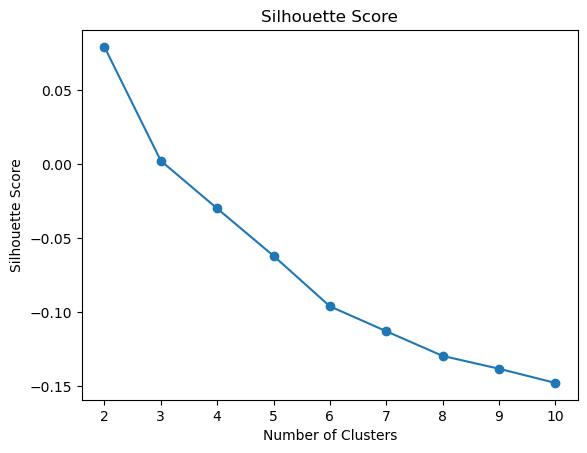

In [205]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

#tentuin sndr rangenya (mau brp k)
for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


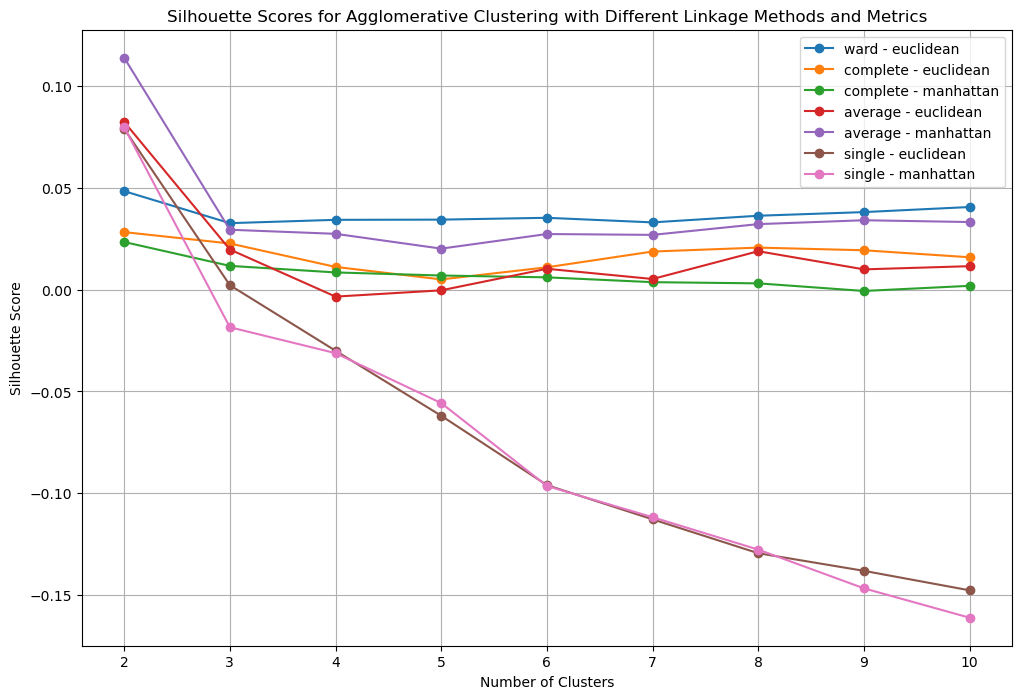

Best Silhouette Score: 0.11397121219230337
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: manhattan


In [206]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)

#linkage - jarak antar clusternya
linkage_methods = ['ward', 'complete', 'average', 'single']

# metric (Euclidean) - jarak antar data points, 1 titik ke titik lain
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        # khusus WARD, ga bisa dipake bareng manhattan
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

In [207]:
# Hierarchical Clustering
agglo_scaled = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_scaled = agglo_scaled.fit_predict(df_scaled)

In [208]:
ss = silhouette_score(df_scaled, y_scaled)
print(ss)

0.11397121219230337


### UNSCALED

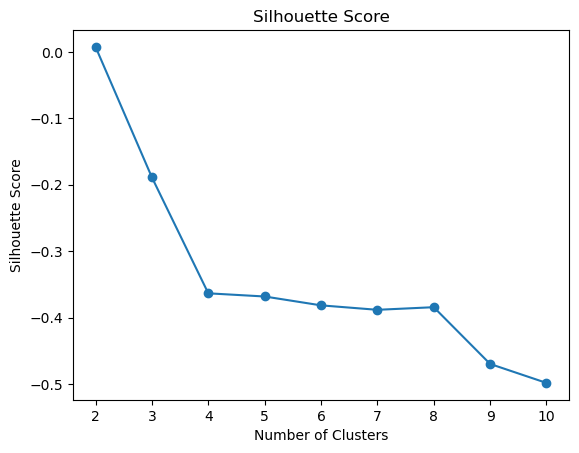

In [209]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

#tentuin sndr rangenya (mau brp k)
for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_unscaled)
    silhouette_avg = silhouette_score(df_unscaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


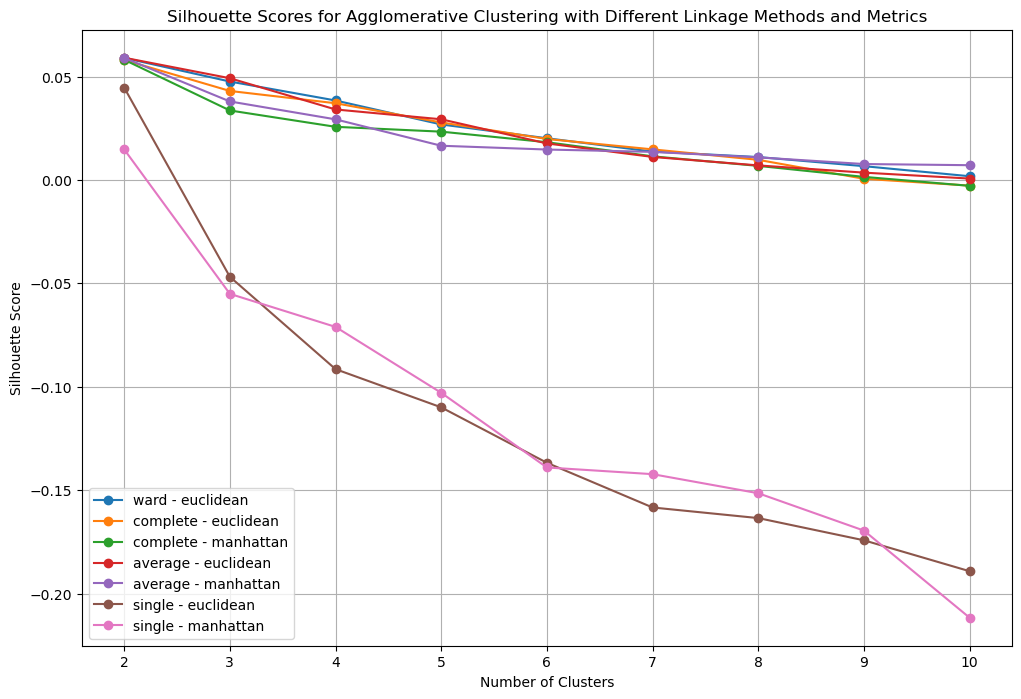

Best Silhouette Score: 0.05910805750555211
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: euclidean


In [210]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)

#linkage - jarak antar clusternya
linkage_methods = ['ward', 'complete', 'average', 'single']

# metric (Euclidean) - jarak antar data points, 1 titik ke titik lain
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        # khusus WARD, ga bisa dipake bareng manhattan
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_unscaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

In [211]:
# Hierarchical Clustering
agglo_unscaled = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_unscaled = agglo_unscaled.fit_predict(df_unscaled)

In [212]:
ss = silhouette_score(df_unscaled, y_unscaled)
print(ss)

0.38755752497321516


### Merge with Original Data

In [213]:
# Add the cluster labels to the original data
df['Agglo_Scaled'] = y_scaled
df['Agglo_Unscaled'] = y_unscaled

# Analyze the clusters with the original values
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Agglo_Scaled,Agglo_Unscaled
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,1,1
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,0,1
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0,1
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,0,0
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,0,0


Compare cluster quality and interpretability 

In [214]:
features = ['Income', 'Age', 'Credit_Score', 'Years_with_Bank',
            'Transaction_Count', 'Balance', 'Loan_Approval_Amount',
            'Credit_Card_Limit', 'Purchase_Frequency', 'Online_Activity']

# Hitung metrik untuk Agglo_Scaled
sil_scaled = silhouette_score(df[features], df['Agglo_Scaled'])
sil_unscaled = silhouette_score(df[features], df['Agglo_Unscaled'])

print(f"Silhouette Score (Scaled): {sil_scaled:.3f}")
print(f"Silhouette Score (Unscaled): {sil_unscaled:.3f}")

Silhouette Score (Scaled): 0.080
Silhouette Score (Unscaled): 0.388


## Visualization

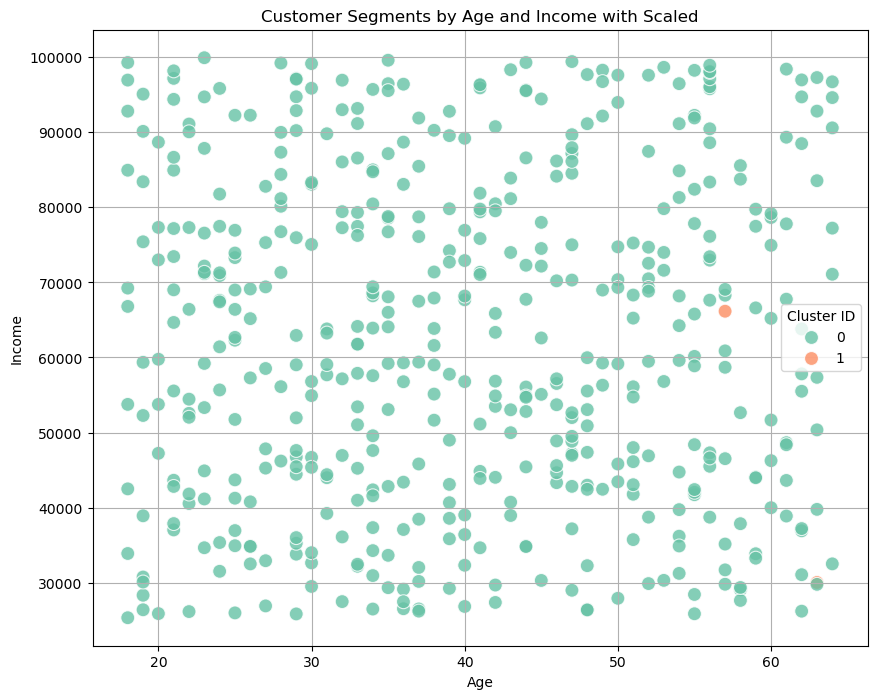

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Income', hue='Agglo_Scaled', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Age and Income with Scaled')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

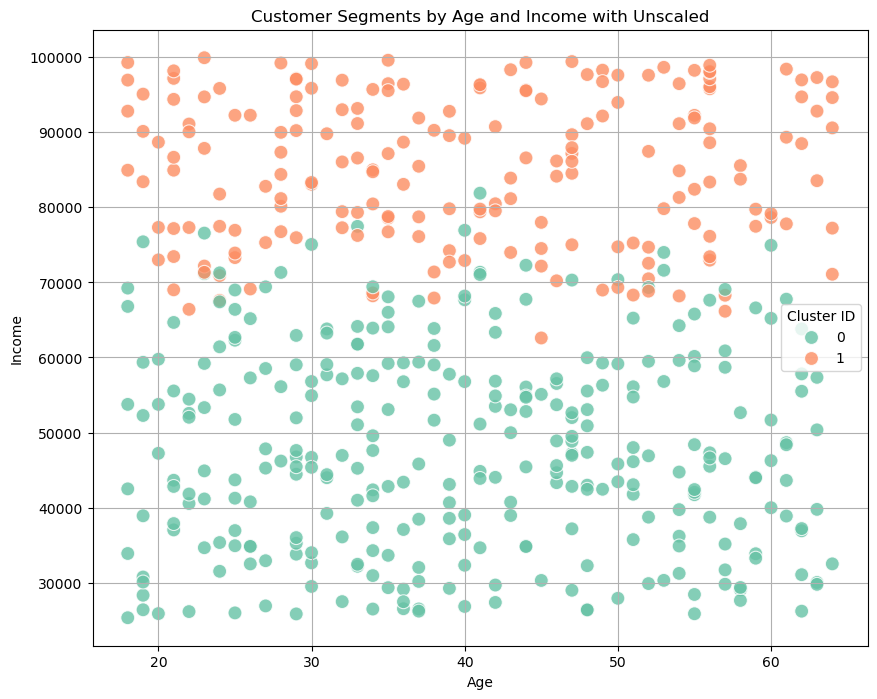

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Income', hue='Agglo_Unscaled', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Age and Income with Unscaled')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

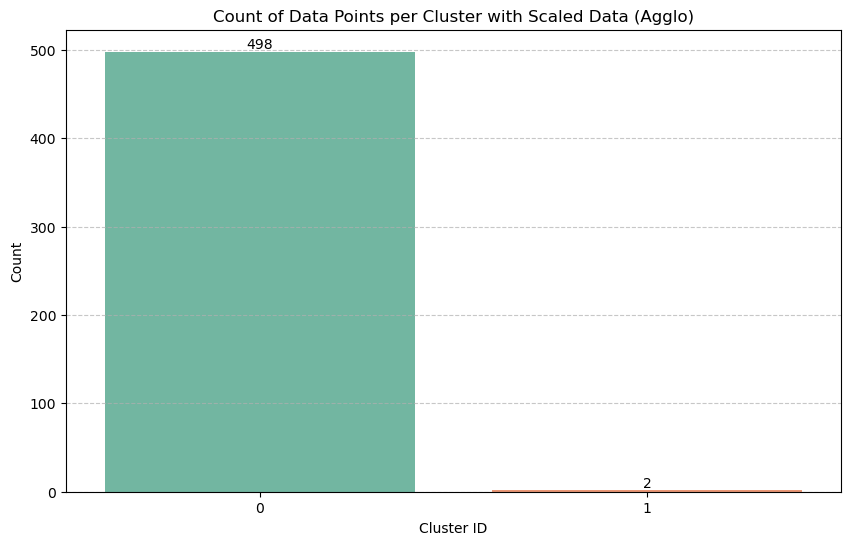

In [219]:
# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo_Scaled'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster with Scaled Data (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

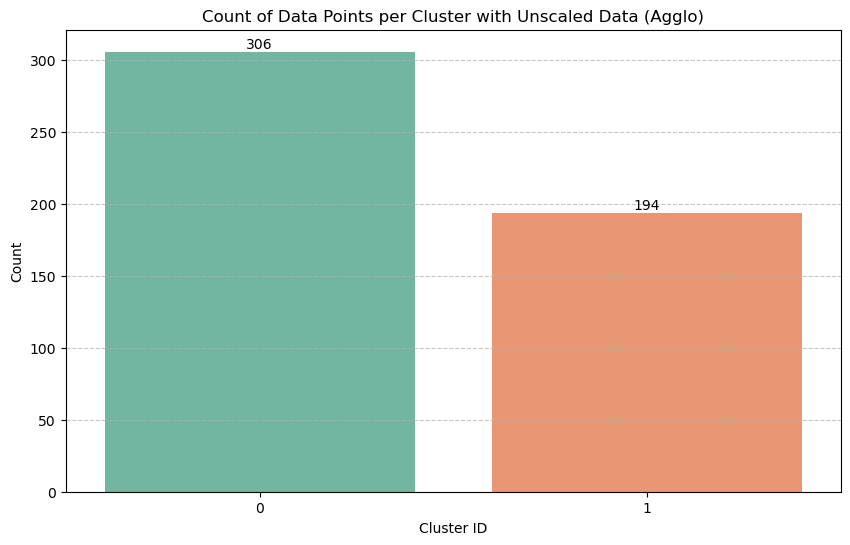

In [220]:
# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo_Unscaled'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster with Unscaled Data (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [223]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Age'
y_col = 'Income'
z_col = 'Education'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo_Scaled'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Agglo Clusters')

fig.show()

In [224]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Age'
y_col = 'Income'
z_col = 'Education'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo_Unscaled'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Agglo Clusters')

fig.show()

## Part D – Segmentation & Managerial Implication

Which version (scaled or unscaled) produces clearer cluster separation?
- The unscaled one has a clearer cluster separation , shown by a higher Silhouette Score (0.388) and a more balanced cluster size (306 vs 194). But in contrast,  the scaled one has almost all data (498/500) falling into one cluster with low Silhouette Score (0.08), showing poor separation.
 
Why does scaling affect the clustering result?
- In agglomerative clustering, the results depend a lot on how the distance between data points is measured. When we use StandardScaler, all columns are adjusted to have a similar scale and average. However, in this dataset, features like Income, Balance, and Credit Limit (financial values) already have natural and meaningful differences and this help the model separate the data better. So after scaling those, the variations became smaller, so the model could not find clear patterns between the data points anymore.

- So it is better to not scale financial features

Choose the result of the Unscaled Data

In [226]:
# Create a cluster summary with descriptive statistics
cluster_summary = df.groupby('Agglo_Unscaled').agg({
    'Education': ['first', 'count'],  # categorical — show example (first) and count
    'Income': ['mean', 'std', 'min', 'max'],
    'Age': ['mean', 'std', 'min', 'max'],
    'Credit_Score': ['mean', 'std', 'min', 'max'],
    'Years_with_Bank': ['mean', 'std', 'min', 'max'],
    'Transaction_Count': ['mean', 'std', 'min', 'max'],
    'Balance': ['mean', 'std', 'min', 'max'],
    'Loan_Approval_Amount': ['mean', 'std', 'min', 'max'],
    'Credit_Card_Limit': ['mean', 'std', 'min', 'max'],
    'Purchase_Frequency': ['mean', 'std', 'min', 'max'],
    'Customer_Satisfaction': ['mean', 'std', 'min', 'max'],
    'Online_Activity': ['mean', 'std', 'min', 'max']
})

# Rename 'first' to 'mode' for better readability
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

# Rename axis for clarity
cluster_summary = cluster_summary.rename_axis('Cluster')

# Show all columns
pd.set_option('display.max_columns', None)

# Show all rows (optional)
pd.set_option('display.max_rows', None)

# Display the result
cluster_summary


Education              Income                             \
                mode count          mean           std          min   
Cluster                                                               
0        High School   306  47810.288172  13563.838595  25352.16071   
1           Bachelor   194  85012.697805   9788.232629  62599.32864   

                            Age                    Credit_Score              \
                 max       mean        std min max         mean         std   
Cluster                                                                       
0        81878.39904  39.843137  12.875504  18  64   566.781046  163.353768   
1        99913.52549  40.273196  13.353023  18  64   562.170103  152.810482   

                  Years_with_Bank                   Transaction_Count  \
         min  max            mean       std min max              mean   
Cluster                                                                 
0        302  849       10.986928  5.063514   1  19         49.977124   
1        300  844       10.520619  5.286809   1  19         46.134021   

                                Balance                                      \
               std min max         mean          std       min          max   
Cluster                                                                       
0        28.529929   1  99  4793.922227  2941.568953  44.90044  9922.434546   
1        28.992094   1  99  5486.971103  2858.718350  99.12599  9984.440444   

        Loan_Approval_Amount                                          \
                        mean           std          min          max   
Cluster                                                                
0               27207.840323  14663.647208  1230.459555  49820.52773   
1               22536.907521  13126.863771  1087.318821  49971.89523   

        Credit_Card_Limit                                         \
                     mean          std          min          max   
Cluster                                                            
0            10899.534334  5675.647652  1017.345471  19968.52056   
1            10153.240825  5387.980128  1123.831875  19659.11871   

        Purchase_Frequency                                \
                      mean       std       min       max   
Cluster                                                    
0                 0.507482  0.277233  0.000813  0.991562   
1                 0.521066  0.292185  0.005398  0.993942   

        Customer_Satisfaction                   Online_Activity            \
                         mean       std min max            mean       std   
Cluster                                                                     
0                    2.539216  1.110353   1   4        0.516430  0.293773   
1                    2.603093  1.087942   1   4        0.459952  0.292992   

                             
              min       max  
Cluster                      
0        0.001432  0.999897  
1        0.001320  0.996199

- Cluster 0 - Young, medium income, highly online
- Cluster 1 - Older, high income, less active online

Cluster 0 
- Meaning / Insight:
Ini adalah kelompok muda hingga menengah yang nyaman dengan produk digital dan online banking.
sehingga cenderung mencari kemudahan, transparansi, dan akses cepat untuk produk finansial atau pembelian.

Managerial Strategy:
- Produk & Campaigns: Tawarkan produk digital seperti aplikasi mobile dengan fitur pembelian cepat, promosi cashback, atau reward untuk aktivitas transaksi rutin.
- Marketing Channels: Fokus pada media digital (social media, ads di aplikasi, email marketing).
- Incentives: Paket promosi untuk pembelian online, simulasi KPR digital, atau bonus transaksi untuk penggunaan online banking.

Engagement: Buat konten edukasi finansial untuk meningkatkan loyalitas dan awareness

Cluster 1
Meaning / Insight:
- Kelompok ini adalah customer yang kaya dan loyal, lebih menghargai keandalan layanan, keamanan, dan kualitas produk daripada fitur digital terbaru sehingga cenderung lebih responsif terhadap layanan personal dan rekomendasi langsung daripada iklan digital.

Managerial Strategy:
- Produk & Campaigns: Tawarkan produk premium atau paket loyalitas, misal program reward untuk pelanggan setia, upgrade limit kartu kredit, dan konsultasi personal.
- Marketing Channels: Gunakan email personal, telemarketing, dan layanan konsultasi untuk membangun hubungan.
- Incentives: Paket eksklusif untuk loyalitas, penawaran investasi, atau simulasi pinjaman eksklusif.

Engagement: Fokus pada customer experience seperti layanan cepat, aman, dan nyaman.

Growth: Focus marketing di Cluster 0 (younger, digitally active, medium-income).
Retention: Focus relationship management, loyalty programs, and premium services di Cluster 1 (older, high-income, loyal).